<h1>Projet-3 : Concevez une application au service de la santé publique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique" data-toc-modified-id="Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique-1">Projet-3 : Concevez une application au service de la santé publique</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Environnement" data-toc-modified-id="Environnement-1.2">Environnement</a></span></li></ul></li><li><span><a href="#1.-Chargement-des-données" data-toc-modified-id="1.-Chargement-des-données-2">1. Chargement des données</a></span></li><li><span><a href="#2.-Nettoyage-du-jeu-de-données" data-toc-modified-id="2.-Nettoyage-du-jeu-de-données-3">2. Nettoyage du jeu de données</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Nettoyage-des-types" data-toc-modified-id="2.1-Nettoyage-des-types-3.0.1">2.1 Nettoyage des types</a></span></li></ul></li></ul></li></ul></div>

<a name='sommaire'>
    <img src="assets/img/combo_logo.jpg" />
</a>

# Projet-3 : Concevez une application au service de la santé publique
## Introduction 
***
- Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.

- **L'idée de l'application** : aide à l'identification des produits à surveiller dans le cas de régime alimentaire liées à la surveillance en utilisant la base d'OpenFood Facts
***
## Environnement

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
import warnings
import IPython as ip
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno 
# Configuration pour travail avec fichier python "tools" de fonctions
%load_ext autoreload
%aimport tools

# Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Recharger les modules pour la conception des fichiers tools

%autoreload 1

warnings.filterwarnings("ignore")

# 1. Chargement des données

In [2]:
# Import données
data = pd.read_csv('assets/datas/openfoodfacts.csv', sep='\t', low_memory=False)

# 2. Nettoyage du jeu de données

In [3]:
# Afficher le nombre de lignes de colonnes et de doublon je de données initial
tools.get_info_data(data,doublon=True)

------------------------------------------------------------------
Taille du jeu de données 

Nombre de lignes : 320772 lignes
Nombre de colonnes : 162 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
------------------------------------------------------------------


In [4]:
# Afficher les 3 premières lignes du jeu de données 
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [5]:
# Création d'un df de travail
df = data.copy()

### 2.1 Nettoyage des types

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,56,34.570000


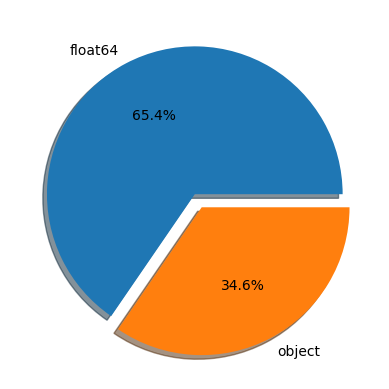

In [6]:
tools.get_types_variables(df,True,True,True)

**Erreur de formattage** : 
On convertie  'created_datetime','last_modified_datetime' en date


In [7]:
# On supprime les erreurs de saisie
# data.loc[data['montant']==-15000, 'montant'] = -14.39
df.loc[df['last_modified_datetime']=='en:belgium,en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:belgium,en:france,en:switzerland','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france,en:switzerland','last_modified_datetime']='NaN'

In [8]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [10]:
df["last_modified_datetime"] =  pd.to_datetime(df["last_modified_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [36]:
df.loc[df['created_datetime']=='Dia,Sogeres','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour market','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU,Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Spar','created_datetime']='NaN'
df.loc[df['created_datetime']=='Banque alimentaire','created_datetime']='NaN'
df.loc[df['created_datetime']=='Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan,Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Cora','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'

In [37]:
df["created_datetime"] =  pd.to_datetime(df["created_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                                  object
url                                                   object
creator                                               object
created_t                                             object
created_datetime                              datetime64[ns]
last_modified_t                                       object
last_modified_datetime                        datetime64[ns]
product_name                                          object
generic_name                                          object
quantity                                              object
packaging                                             object
packaging_tags                                        object
brands                                                object
brands_tags                                           object
categories                                            object
categories_tags                                       object
categories_fr           


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,54,33.330000
datetime64[ns],2,1.230000


ValueError: 'explode' must be of length 'x'

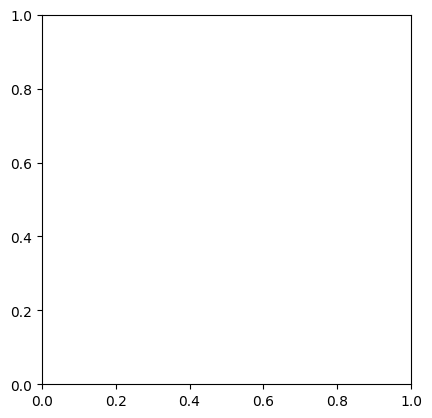

In [38]:
tools.get_types_variables(df,True,True,True)

In [ ]:
df.dtypes

https://www.kaggle.com/code/michaelfumery/openfoodfacts-data-cleaning

In [ ]:
# On supprime la ligne ?

- Les types semblent cohérent avec ce qu'ils représentent

In [ ]:
tools.get_description_variables(df,type_var='categ')

In [ ]:
tools.get_description_variables(df,type_var='num')

<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>

https://www.kaggle.com/code/ymmn233413/youssef-moumna-p3-02-notebook-v0-ipynb

<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>